## Data Visualisation and Exploration, COMS4060A.

### Assignment 1.

### Overview

This is a report for a task to perform some basic data cleaning and exploration techniques on the logbook dataset that was obtained from a company that provides a service for users to keep a logbook of their fuel usage - when and where they fill up, how
much the fill up etc. The logbook also allows users to capture car services and repairs. The main goal was to explore the dataset and make orbservations.

 The dataset has
been scraped from their website and it is messy. So, it sifficed that we were critical of the data, questioned our findings, and in-depth investigated the data.

We used graphs and descriptive statistics to provide insights into the contents of the data.

 Nominally, the dataset has the following features:
 - date_fueled: The date that the user refueled their vehicle (usually in the format DD mmm YYYY).
 - date_captured: The date that the user entered the information (usually in the format DD mmm
YYYY).
 - user_url: The URL for the user that captured this information.
 - odometer: The odometer reading at the time of refueling.
 - gallons: How many gallons they refueled with.
 - cost_per_gallon: The cost per gallon in the local currency
 - total_spent: The total amount spent in the local currency
 - mpg: The computed fuel efficiency in miles per gallon (MPG).
 - miles: The number of miles driven on this tank of fuel.


###  Getting Ready:
In this section we are going to import all the libraries that we have deemed neccessary for implementation of this assignnment. We are also going to read the data we are going to be exploring and investigating. 



In [1]:
#!pip install missingno this pip installs the missngo package
#!pip install mlxtend this installs the mlxtend package
#All the libraries neccesary for the assignment
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import missingno  
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import mutual_info_classif, f_classif

In [2]:
#upload the dataset in question
#print a sample of the data (head)

raw_data = pd.read_csv('logbook_assignment1.csv')
raw_data.head()

C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\3636165530.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


### Preprocessing
Preprocessing in the context of this assignment means first few steps that we took before doing the intended job. That is understanding the attributes in the data- defining variables referencing their domain, calculating some basic descriptive stats to briefly describe the data. 

The dataset is a CSV file, meaning that this is a structured data. There are 6 numeric vatiables and 3 categoral variables. 

In this step, there was no variable that we identified to be out of scope, all variables seemed to be named with accordance to the domain.

We used pandas to quickly get an overview of our data through the use of the df.describe fuction. See the code and the output below:

In [3]:
raw_data.describe()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
count,1125700,1174870,1025716,1100660,1094110,1100660,1100660.0,146274,1174870
unique,69687,5000,261377,56817,52785,190040,3903.0,9080,120232
top,Apr 9 2022,Aug 31 2016,1,10.567,$2.999,$0.00,0.0,300.0,https://www.somewebsite.com/jeep/wrangler/2007...
freq,2375,4346,158,1852,14698,6216,115805.0,283,29


The results above are a quick overview of the data we obtained using librabries. The count let us know of the number of entries per feature. Since the count values are not equal this simply implies that there are columns that contains null entries. Using user_url as the primary identifier, we would say the expected entries for all of the columns should be 1174870 but in other columns like miles there are way less entries. Meaning the miles feature has more missing values than any of the features.

The unique attribute reveals entries that are unique in each column in the data. An important detail that this gave us was that this data was actually gathered from about 12000 users. This might help us dimentionality reduction and in better understanding the dataset. 

The freq help us get the count of the entries(values) that appear more than others. We saw that there were about 29 users who were frequnt...


The last part to understand before we dig deep into the fun stuff is to know the data type for each feature. Below, we used the df.info() function to help us get that informations. The dataset has 9 columns with 1174870 entries with all Dtype of object.

## 1.1 Date Fields

1. Date fields contain a date data type in a form of dd/mm/yyyy for the sake of this assignment. As it can be seen from the above df.describe method that the date_fueled has entries that are less that the total entries in the dataset. This implies that there are entries in this feature that are either missing or incorrect. We calculated the percentage of date_fueled for entries that are not proper dates to know how much entries are incorrect.   

    So, we want to know in general, how many date_fueled entries that were faulty in the beginning. As per the code below, there were about 4.18% of date that were not proper. 



In [4]:
raw_data.isnull().sum()/len(raw_data) * 100

date_fueled         4.185144
date_captured       0.000000
odometer           12.695362
gallons             6.316444
cost_per_gallon     6.873952
total_spent         6.316444
mpg                 6.316444
miles              87.549771
user_url            0.000000
dtype: float64

2. Next, for date_fueled that was not entered correctly or is not a date (that is, there is a value but not really a date format that we know), we used date_captured value as a proxy. (Continuing from the previous step, we want to have easy readability and consistency within columns and their attributes. To help our exploration and analysis become more effective:)



In [5]:
#Here we convert the column to a date format, setting any invalid date fueled entries to NaT
raw_data['date_fueled'] = pd.to_datetime(raw_data['date_fueled'], errors='coerce')

C:\Users\rmnev\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [6]:
raw_data.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,NaT,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


The invalid date entries have now been converted to NaT

In [7]:
# We calculate the percentage of date_fueled entries that are not proper dates
# only after converting all the invalid date entries to NaT
raw_data.isnull().sum()/len(raw_data) * 100

date_fueled        11.657630
date_captured       0.000000
odometer           12.695362
gallons             6.316444
cost_per_gallon     6.873952
total_spent         6.316444
mpg                 6.316444
miles              87.549771
user_url            0.000000
dtype: float64

The percentage of date_fueled entries that are not proper dates is 11.66%

Now we have to remove dates that are in the future, or dates that are earlier than 2005

In [8]:
#we first sort the dates in ascending order
raw_data = raw_data.sort_values(by="date_fueled")

In [9]:
#we filter the data
filtered_data = raw_data.loc[(raw_data['date_fueled'] >= '2005') & (raw_data['date_fueled'] <= '2022')]

In [10]:
filtered_data.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
116779,2005-01-02,Feb 19 2012,NaN,21.400,$0.000,$0.00,17.0,364.2,https://www.somewebsite.com/ford/f-350/1991/11...
964318,2005-01-05,Jun 3 2020,"95,556",8.982,Ft874,"Ft7,854",35.7,NaN,https://www.somewebsite.com/mazda/323/1986/100...
341874,2005-01-06,Oct 11 2008,"153,582",12.598,$1.990,$25.07,21.4,NaN,https://www.somewebsite.com/bmw/535i/1986/10501
802421,2005-01-07,Jun 30 2015,"97,166",14.532,£2.91,£42.30,22.6,NaN,https://www.somewebsite.com/ford/mondeo/1995/3...
187118,2005-01-09,Sep 16 2011,"110,955",19.208,R0.00,R0.00,19.4,NaN,https://www.somewebsite.com/mercedes-benz/500s...


We have now removed all dates that are before 2005 and after 2022(future date)

### Distribution of fueling dates
We now plot the data distribution for fueling dates column.

<AxesSubplot:>

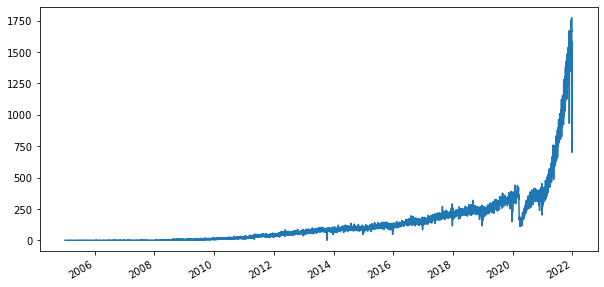

In [11]:
plt.figure(figsize=(10, 5))
filtered_data['date_fueled'].value_counts().plot()

From the above plot we can see that the fuel consumption increased yearly from 2005 until it decreased in 2020, probably due to the pandemic. It then increased again until the present year 2022.

## 1.2 Numerical Fields

In [12]:
filtered_data.isnull().sum()/len(filtered_data) * 100

date_fueled         0.000000
date_captured       0.000000
odometer           12.622035
gallons             3.535624
cost_per_gallon     4.131934
total_spent         3.535624
mpg                 3.535624
miles              87.604429
user_url            0.000000
dtype: float64

<AxesSubplot:>

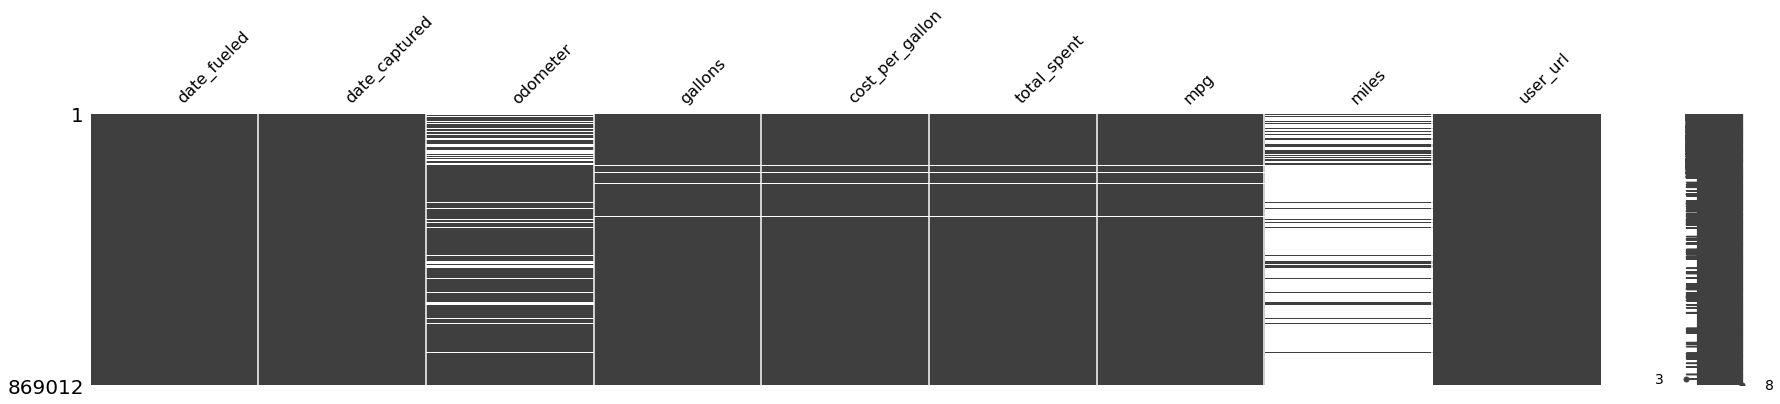

In [13]:
# missing values visualization
missingno.matrix(filtered_data, figsize = (30,5))

The percentages of missing entries using the filtered_data are as follows :
 - gallons = 3.53%
 - miles =  87.6%
 - odometer = 12.62%

Here we remove commas from some string values, to enable us to convert the columns (mpg,gallons & miles) to a float data type

In [14]:
filtered_data['miles'] = [str(x).replace(',','') for x in filtered_data['miles']]
filtered_data["miles"] = pd.to_numeric(filtered_data["miles"], downcast="float",errors='coerce')
filtered_data['gallons'] = [str(x).replace(',','') for x in filtered_data['gallons']]
filtered_data["gallons"] = pd.to_numeric(filtered_data["gallons"], downcast="float",errors='coerce')
filtered_data['mpg'] = [str(x).replace(',','') for x in filtered_data['mpg']]
filtered_data["mpg"] = pd.to_numeric(filtered_data["mpg"], downcast="float",errors='coerce')


In [15]:
print(filtered_data.dtypes)

date_fueled        datetime64[ns]
date_captured              object
odometer                   object
gallons                   float32
cost_per_gallon            object
total_spent                object
mpg                       float32
miles                     float32
user_url                   object
dtype: object


mpg, gallons and miles are now converted to float data type

In [16]:
#here we calculate the entries for the miles column
filtered_data['miles']=filtered_data['gallons']*filtered_data['mpg']

In [17]:
filtered_data.isnull().sum()/len(filtered_data) * 100

date_fueled         0.000000
date_captured       0.000000
odometer           12.622035
gallons             3.535624
cost_per_gallon     4.131934
total_spent         3.535624
mpg                 3.535624
miles               3.535624
user_url            0.000000
dtype: float64

We can now see that the miles column now has less missing entries, from 87.6% to 3.53%

<AxesSubplot:>

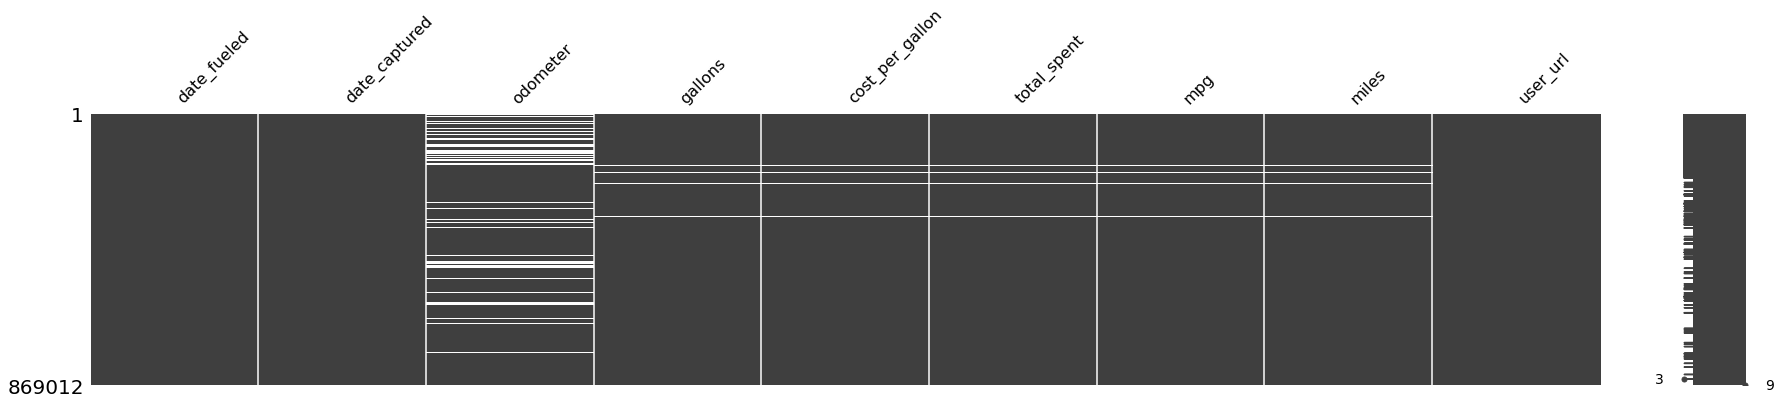

In [18]:
# missing number visualization
missingno.matrix(filtered_data, figsize = (30,5))

### Plotting the distributions

we plot the distributions without including the missing values

Text(0.5, 1.0, 'Relationship between miles and gallons')

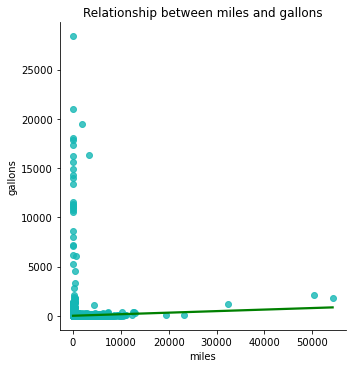

In [19]:
sns.lmplot(x = 'miles', y = 'gallons', data = filtered_data, height=5, ci=False,
         line_kws={'color':'green'}, scatter_kws={'color':'#15B7B5'})
plt.title('Relationship between miles and gallons')

By using the regression line, we can say that miles and gallons are directly proportional.
As one variable increases, so does the other

Text(0.5, 1.0, 'Relationship between mpg and gallons')

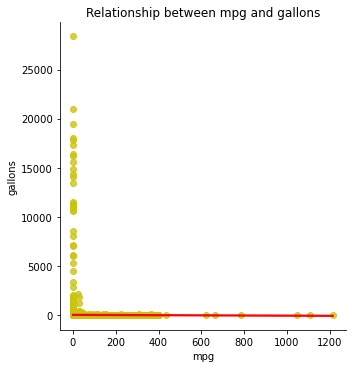

In [20]:
sns.lmplot(x = 'mpg', y = 'gallons', data = filtered_data, height=5, ci=False,
         line_kws={'color':'red'}, scatter_kws={'color':'#CBC311'})
plt.title('Relationship between mpg and gallons')

By using the regression line, we can say that mpg and gallons are indirectly proportional.
As one variable increases the other decreases

Text(0.5, 1.0, 'Relationship between miles and mpg')

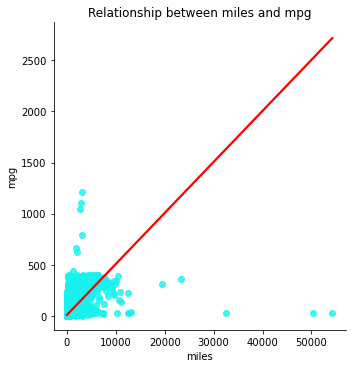

In [21]:
sns.lmplot(x = 'miles', y = 'mpg', data = filtered_data, height=5, ci=False,
         line_kws={'color':'red'}, scatter_kws={'color':'#19F1EE'})
plt.title('Relationship between miles and mpg')

By using the regression line, we can say that miles and mpg are directly proportional.


In [22]:
filtered_data.describe()

,gallons,mpg,miles
count,838287.000000,838287.000000,838287.000000
mean,12.964628,22.261560,267.728058
std,80.645149,16.135521,216.729019
min,0.000000,0.000000,0.000000
25%,9.132000,15.600000,183.752380
50%,12.078000,21.900000,269.878418
75%,15.005000,28.600000,346.609985
max,28380.000000,1214.300049,54267.546875


The miles, gallons and mpg columns are interdependent.

# 2  Feature Engineering

### Adding new columns to the dataset

Here we create a new column called  **total_spent_float** containing the float values of the **total_spent**

In [23]:
#creating new column
filtered_data['total_spent_float'] = filtered_data['total_spent']
#remove all commas
filtered_data['total_spent_float'] = [str(x).replace(',','') for x in filtered_data['total_spent_float']]
#remove all currency symbols
filtered_data['total_spent_float'] = filtered_data['total_spent_float'].str.replace("[^\d\.]", '')
#converting to float data type
filtered_data['total_spent_float']  = pd.to_numeric(filtered_data['total_spent_float'], downcast="float",errors='coerce')

C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\111857402.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['total_spent_float'] = filtered_data['total_spent_float'].str.replace("[^\d\.]", '')


Here we create a new column **cost_per_gallon_float** containing the float values of the **cost_per_gallon**

In [24]:
#creating new column
filtered_data['cost_per_gallon_float'] = filtered_data['cost_per_gallon']
#remove all commas
filtered_data['cost_per_gallon_float'] = [str(x).replace(',','') for x in filtered_data['cost_per_gallon_float']]
#remove all currency symbols
filtered_data['cost_per_gallon_float']= filtered_data['cost_per_gallon_float'].apply(str).str.replace("[^\d\.]", '')
#converting to float data type
filtered_data['cost_per_gallon_float']  = pd.to_numeric(filtered_data['cost_per_gallon_float'], downcast="float",errors='coerce')
#checking the data types of new columns
filtered_data[['cost_per_gallon_float', 'total_spent_float']].head()


C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\656612391.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['cost_per_gallon_float']= filtered_data['cost_per_gallon_float'].apply(str).str.replace("[^\d\.]", '')


,cost_per_gallon_float,total_spent_float
116779,0.00,0.000000
964318,874.00,7854.000000
341874,1.99,25.070000
802421,2.91,42.299999
187118,0.00,0.000000


In [25]:
filtered_data[['cost_per_gallon_float', 'total_spent_float']].dtypes

cost_per_gallon_float    float32
total_spent_float        float32
dtype: object

The two new columns have float data type

We now create new 4 new columns: **Car make**  **model** , **year**,**User ID** and we extract their entries from **user_url**

In [26]:
#creating new columns
filtered_data['Car make'] = filtered_data['user_url']
filtered_data['model'] = filtered_data['user_url']
filtered_data['year'] = filtered_data['user_url']
filtered_data['User ID'] = filtered_data['user_url']
#parsing the url
filtered_data['Car make'] =filtered_data['Car make'].str.split('/').str[3]
filtered_data['model'] = filtered_data['model'].str.split('/').str[4]
filtered_data['year'] = filtered_data['year'].str.split('/').str[5]
filtered_data['User ID'] = filtered_data['User ID'].str.split('/').str[6]
#print the new columns
filtered_data[['Car make','model','year', 'User ID']].head()

,Car make,model,year,User ID
116779,ford,f-350,1991,110399
964318,mazda,323,1986,1008607
341874,bmw,535i,1986,10501
802421,ford,mondeo,1995,373006
187118,mercedes-benz,500se,1990,63822


We parsed the urls and extracted the relevant data from them

### Imperial to metric units conversion

We create 3 new columns:  **litres filled**, **km driven**, **litres per 100 km** and we convert the columns: gallons, miles and mpg from the imprerial to the metric system respectively

In [27]:
#converting US gallons to litres
filtered_data['litres filled'] = filtered_data['gallons']*3.785
#converting miles to kilometres
filtered_data['km driven'] = filtered_data['miles']*1.609
#converting miles per gallon to litres per 100 km
filtered_data['litres per 100 km'] = 235.215/filtered_data['mpg']
filtered_data[['litres filled','km driven','litres per 100 km']].head()

,litres filled,km driven,litres per 100 km
116779,80.999001,585.354187,13.836176
964318,33.996872,515.937744,6.588655
341874,47.683430,433.781891,10.991355
802421,55.003620,528.432922,10.407743
187118,72.702286,599.570007,12.124485


The respective columns now have metric unit values

Here we create the **age** column

In [28]:
filtered_data.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cost_per_gallon_float,Car make,model,year,User ID,litres filled,km driven,litres per 100 km
116779,2005-01-02,Feb 19 2012,NaN,21.400,$0.000,$0.00,17.000000,363.799988,https://www.somewebsite.com/ford/f-350/1991/11...,0.000000,0.00,ford,f-350,1991,110399,80.999001,585.354187,13.836176
964318,2005-01-05,Jun 3 2020,"95,556",8.982,Ft874,"Ft7,854",35.700001,320.657410,https://www.somewebsite.com/mazda/323/1986/100...,7854.000000,874.00,mazda,323,1986,1008607,33.996872,515.937744,6.588655
341874,2005-01-06,Oct 11 2008,"153,582",12.598,$1.990,$25.07,21.400000,269.597198,https://www.somewebsite.com/bmw/535i/1986/10501,25.070000,1.99,bmw,535i,1986,10501,47.683430,433.781891,10.991355
802421,2005-01-07,Jun 30 2015,"97,166",14.532,£2.91,£42.30,22.600000,328.423187,https://www.somewebsite.com/ford/mondeo/1995/3...,42.299999,2.91,ford,mondeo,1995,373006,55.003620,528.432922,10.407743
187118,2005-01-09,Sep 16 2011,"110,955",19.208,R0.00,R0.00,19.400000,372.635193,https://www.somewebsite.com/mercedes-benz/500s...,0.000000,0.00,mercedes-benz,500se,1990,63822,72.702286,599.570007,12.124485


## 3 Vehicle Exploration

We first create a column with the different currencies to able to proxy the number of unique users per country

In [29]:
#creating the new currency only column
filtered_data['currency'] = filtered_data['total_spent']
filtered_data['currency'] = filtered_data['currency'].str.replace('\d+', '')
filtered_data['currency'].head()

C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\3681894636.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['currency'] = filtered_data['currency'].str.replace('\d+', '')


116779     $.
964318    Ft,
341874     $.
802421     £.
187118     R.
Name: currency, dtype: object

In [30]:
#check the number of unique currencies
filtered_data['currency'].value_counts().head(5)

$.      538457
£.       70180
€.       49321
CA$.     34829
R.       24257
Name: currency, dtype: int64

### Plotting the number of unique users per country

(0.0, 10.0)

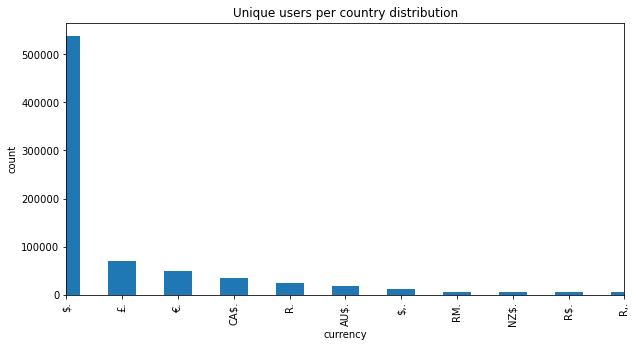

In [31]:
plt.figure(figsize=(10, 5))
filtered_data['currency'].value_counts().plot.bar()
plt.title("Unique users per country distribution")
plt.xlabel('currency')
plt.ylabel('count')
plt.xlim(0, 10)

The graph above shows the number of unique users per country (proxied by currency)
i.e we can see that most users are from the United States because the currency that is most used is the dollar US dollar ($)

### Plotting the number of unique users per day

We have to plot the number unique User ID vs date captured i.e how many people used/entered information per day.

In [32]:
#check the number of unique users 
filtered_data['date_captured'].value_counts().head()

Aug 31 2016    4017
Mar 6 2017     3228
Sep 1 2016     3117
Aug 30 2016    1909
Dec 23 2021    1839
Name: date_captured, dtype: int64

(0.0, 20.0)

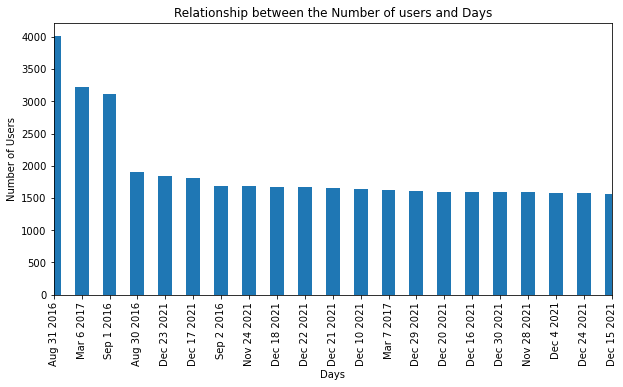

In [33]:
plt.figure(figsize=(10, 5))
filtered_data['date_captured'].value_counts().plot.bar()
plt.title("Relationship between the Number of users and Days")
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.xlim(0, 20)

### Plotting the distribution of age of the vehicles per country

(10.0, 0.0)

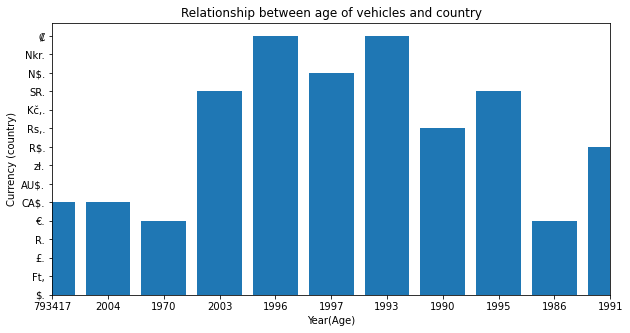

In [34]:
plt.figure(figsize=(10, 5))


plot_distrubution_x = filtered_data[(filtered_data.year.notnull())]['year'][:1000]
plot_distribution_y = filtered_data[(filtered_data.currency.notnull())]['currency'][:1000]

plt.bar(plot_distrubution_x,plot_distribution_y, label="year vs currency")
plt.title("Relationship between age of vehicles and country")
plt.xlabel('Year(Age)')
plt.ylabel('Currency (country)')
plt.xlim(10, 0)

The plot shows the distribution of age (year it was purchased) of the vehicles per country, where the currency denotes the country

### Plotting the most popular car make and model

The above plot shows number of unique users per day

(0.0, 20.0)

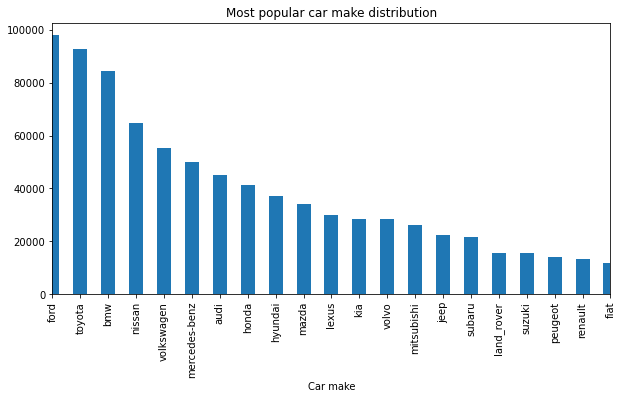

In [35]:
plt.figure(figsize=(10, 5))
filtered_data['Car make'].value_counts().plot.bar()
plt.title("Most popular car make distribution")
plt.xlabel('Car make')
plt.xlim(0, 20)

The above plot shows that Ford is the most popular car make

(0.0, 20.0)

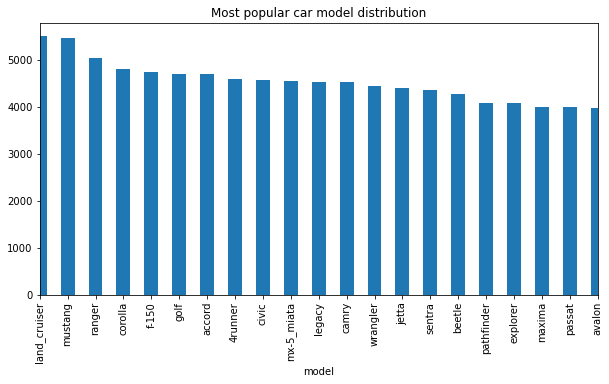

In [36]:
plt.figure(figsize=(10, 5))
filtered_data['model'].value_counts().plot.bar()
plt.title("Most popular car model distribution")
plt.xlabel('model')
plt.xlim(0, 20)

The above plot shows that the Land Cruiser is the most popular car model

## 4 Fuel Usage

### 4.1 Outlier Removal

In [37]:
#We identify the top 5 currencies using total spent
filtered_data['currency'].value_counts().head()

$.      538457
£.       70180
€.       49321
CA$.     34829
R.       24257
Name: currency, dtype: int64

The top 5 currencies by number of transactions are: Dollar, Pound ,Euro,Canadian Dollar and Rand


## Outlier Detection & Removal

We utilize a boxplot to visualize and detect the outliers for each of the top 5 currencies.
Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot. We will then remove outliers by considering the total spend, litres, cost per litre, gallons, etc

## Rand (R) - Outlier removal

In [38]:
#removing Rand (R) outliers
rand = filtered_data.loc[filtered_data['currency'] == 'R.']
#Old shape
rand.shape

(24257, 19)

<AxesSubplot:xlabel='gallons'>

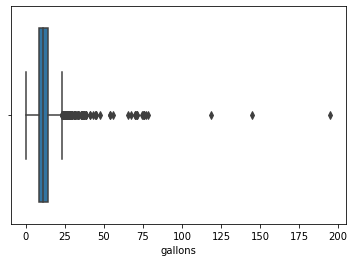

In [39]:
#Rand outlier visualization
sns.boxplot(x=rand['gallons'])

#Outlier removal 
rand = rand.drop(rand[(rand['gallons'] > 22)].index)

<AxesSubplot:xlabel='mpg'>

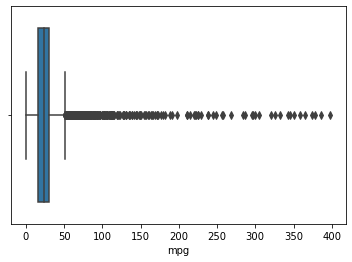

In [40]:
#Outlier visualization
sns.boxplot(x=rand['mpg'])

In [41]:
#Outlier removal
rand = rand.drop(rand[(rand['mpg'] > 50)].index)

<AxesSubplot:xlabel='miles'>

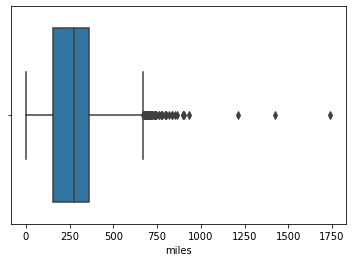

In [42]:
#Outlier visualization
sns.boxplot(x=rand['miles'])

In [43]:
#Outlier removal 
rand = rand.drop(rand[(rand['miles'] > 665)].index)


<AxesSubplot:xlabel='cost_per_gallon_float'>

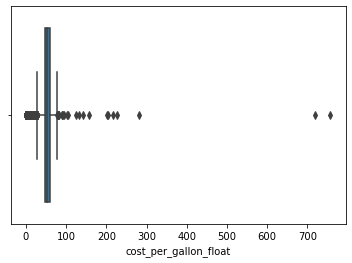

In [44]:
#Outlier visualization
sns.boxplot(x=rand['cost_per_gallon_float'])

In [45]:
#Outlier removal 
rand = rand.drop(rand[(rand['cost_per_gallon_float'] > 70)].index)
rand = rand.drop(rand[(rand['cost_per_gallon_float'] < 32)].index)


<AxesSubplot:xlabel='litres filled'>

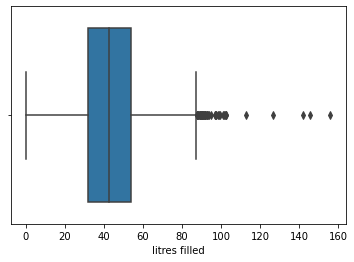

In [46]:
#Outlier visualization
sns.boxplot(x=rand['litres filled'])

In [47]:
#Outlier removal
rand = rand.drop(rand[(rand['litres filled'] > 86)].index)

<AxesSubplot:xlabel='km driven'>

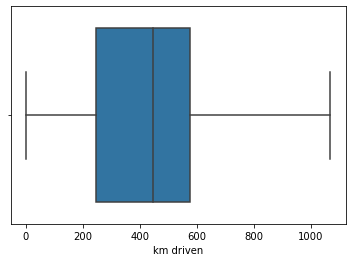

In [48]:
#Outlier visualization
sns.boxplot(x=rand['km driven'])

In [49]:
#Outlier removal 
rand = rand.drop(rand[(rand['km driven'] > 1000)].index)

<AxesSubplot:xlabel='litres per 100 km'>

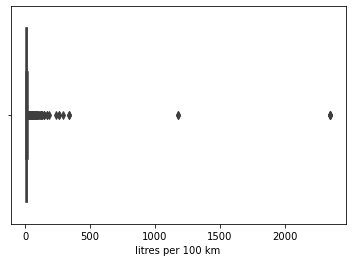

In [50]:
#Outlier visualization
sns.boxplot(x=rand['litres per 100 km'])

In [51]:
#Outlier removal
rand = rand.drop(rand[(rand['litres per 100 km'] > 15)].index)
rand = rand.drop(rand[(rand['litres per 100 km'] < 3)].index)

In [52]:
#new shape
rand.shape

(16727, 19)

The outliers for the Rand have been visualized and removed.

## Pound (£) - Outlier removal

In [53]:
#removing Rand (R) outliers
pound = filtered_data.loc[filtered_data['currency'] == '£.']
#Old shape
pound.shape

(70180, 19)

<AxesSubplot:xlabel='gallons'>

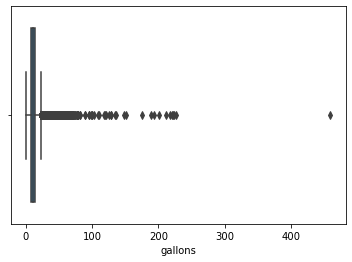

In [54]:
#Pound outlier visualization
sns.boxplot(x=pound['gallons'])

In [55]:
#Outlier removal
pound = pound.drop(pound[(pound['gallons'] > 22)].index)

<AxesSubplot:xlabel='mpg'>

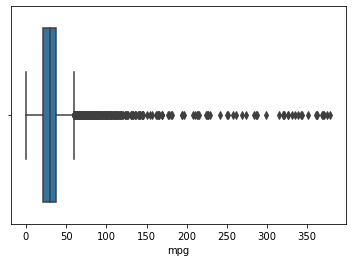

In [56]:
#Outlier visualization
sns.boxplot(x=pound['mpg'])

In [57]:
#Outlier removal
pound = pound.drop(pound[(pound['mpg'] > 50)].index)


<AxesSubplot:xlabel='miles'>

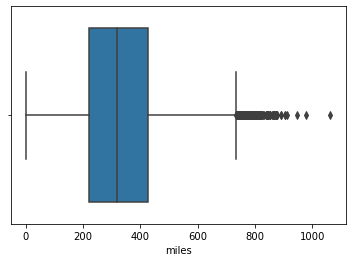

In [58]:
#Outlier visualization
sns.boxplot(x=pound['miles'])

In [59]:
#Outlier removal
pound = pound.drop(pound[(pound['miles'] > 700)].index)

<AxesSubplot:xlabel='total_spent_float'>

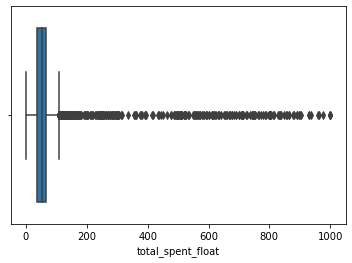

In [60]:
#Outlier visualization
sns.boxplot(x=pound['total_spent_float'])

In [61]:
#Outlier removal
pound = pound.drop(pound[(pound['total_spent_float'] > 100)].index)

<AxesSubplot:xlabel='cost_per_gallon_float'>

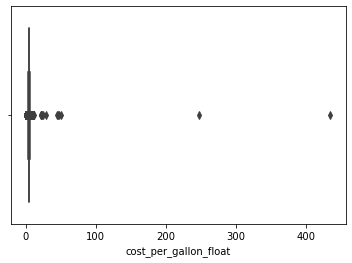

In [62]:
#Outlier visualization
sns.boxplot(x=pound['cost_per_gallon_float'])

In [63]:
#Outlier removal
pound = pound.drop(pound[(pound['cost_per_gallon_float'] > 6)].index)
pound = pound.drop(pound[(pound['cost_per_gallon_float'] < 3.5)].index)

<AxesSubplot:xlabel='km driven'>

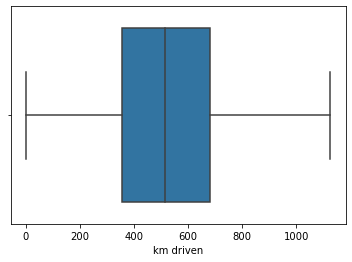

In [64]:
#Outlier visualization
sns.boxplot(x=pound['km driven'])

In [65]:
pound = pound.drop(pound[(pound['km driven'] > 1200)].index)

<AxesSubplot:xlabel='litres per 100 km'>

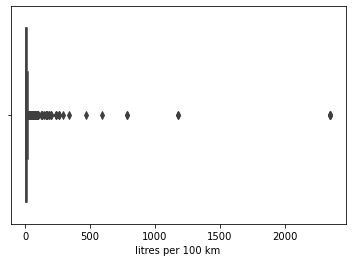

In [66]:
#Outlier visualization
sns.boxplot(x=pound['litres per 100 km'])

In [67]:
pound = pound.drop(pound[(pound['litres per 100 km'] > 12)].index)
pound = pound.drop(pound[(pound['litres per 100 km'] < 2)].index)

In [68]:
#new shape
pound.shape

(50456, 19)

The outliers for the Pound have been visualized and removed

## Euro (€) - Outlier removal

In [69]:
#removing Rand (R) outliers
euro = filtered_data.loc[filtered_data['currency'] == '€.']
#Old shape
euro.shape

(49321, 19)

<AxesSubplot:xlabel='gallons'>

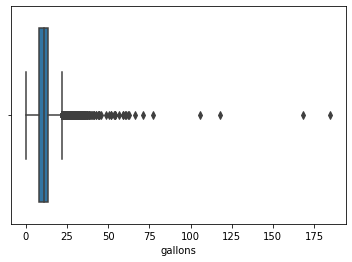

In [70]:
#Outlier visualization
sns.boxplot(x=euro['gallons'])

In [71]:
#Outlier removal
euro= euro.drop(euro[(euro['gallons'] > 21)].index)

<AxesSubplot:xlabel='mpg'>

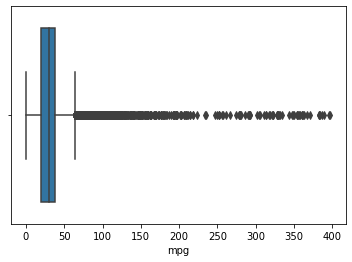

In [72]:
#Outlier visualization
sns.boxplot(x=euro['mpg'])

In [73]:
#Outlier removal
euro= euro.drop(euro[(euro['mpg'] > 55)].index)

<AxesSubplot:xlabel='miles'>

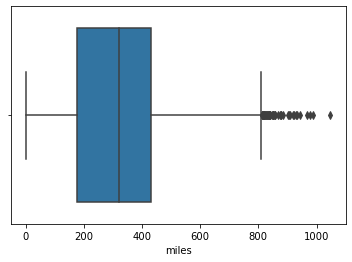

In [74]:
#Outlier visualization
sns.boxplot(x=euro['miles'])

In [75]:
#Outlier removal
euro= euro.drop(euro[(euro['miles'] > 800)].index)

<AxesSubplot:xlabel='total_spent_float'>

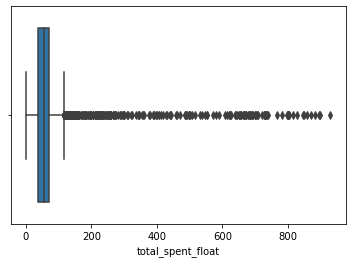

In [76]:
#Outlier visualization
sns.boxplot(x=euro['total_spent_float'])


In [77]:
#Outlier removal
euro= euro.drop(euro[(euro['total_spent_float'] > 110)].index)

<AxesSubplot:xlabel='cost_per_gallon_float'>

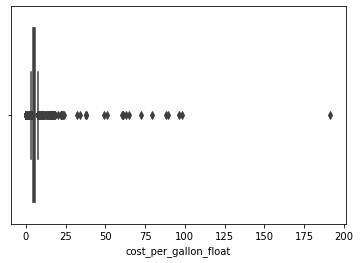

In [78]:
#Outlier visualization
sns.boxplot(x=euro['cost_per_gallon_float'])

In [79]:
#Outlier removal
euro= euro.drop(euro[(euro['cost_per_gallon_float'] > 7)].index)
euro= euro.drop(euro[(euro['cost_per_gallon_float'] < 3.3)].index)

<AxesSubplot:xlabel='litres per 100 km'>

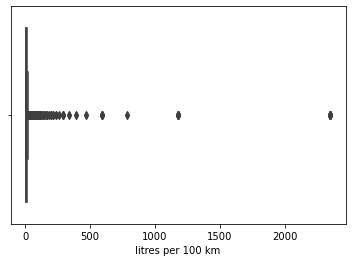

In [80]:
#Outlier visualization
sns.boxplot(x=euro['litres per 100 km'])

In [81]:
#Outlier removal
euro= euro.drop(euro[(euro['litres per 100 km'] > 11)].index)

In [82]:
euro.shape

(32627, 19)

The outliers for the Euro have been visualized and removed

## Canadian Dollar (CA$) - Outlier removal

In [83]:
#removing Rand (R) outliers
can_dollar = filtered_data.loc[filtered_data['currency'] == 'CA$.']
#Old shape
can_dollar.shape

(34829, 19)

<AxesSubplot:xlabel='gallons'>

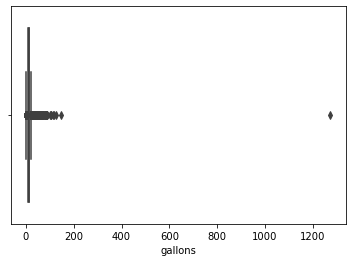

In [84]:
#Outlier visualization
sns.boxplot(x=can_dollar['gallons'])

In [85]:
#Outlier removal
can_dollar= can_dollar.drop(can_dollar[(can_dollar['gallons'] > 20)].index)
can_dollar= can_dollar.drop(can_dollar[(can_dollar['gallons'] < 3)].index)

<AxesSubplot:xlabel='mpg'>

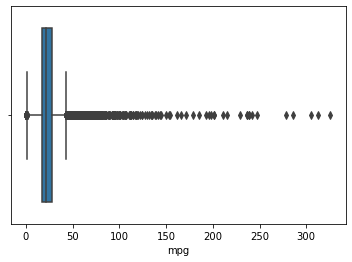

In [86]:
#Outlier visualization
sns.boxplot(x=can_dollar['mpg'])

In [87]:
#Outlier removal
can_dollar= can_dollar.drop(can_dollar[(can_dollar['mpg'] > 40)].index)
can_dollar= can_dollar.drop(can_dollar[(can_dollar['mpg'] < 6)].index)

<AxesSubplot:xlabel='miles'>

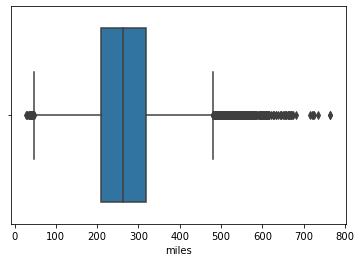

In [88]:
#Outlier visualization
sns.boxplot(x=can_dollar['miles'])

In [89]:
#Outlier removal
can_dollar= can_dollar.drop(can_dollar[(can_dollar['miles'] >450)].index)
can_dollar= can_dollar.drop(can_dollar[(can_dollar['miles'] <55)].index)

<AxesSubplot:xlabel='total_spent_float'>

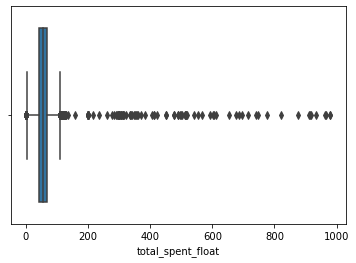

In [90]:
#Outlier visualization
sns.boxplot(x=can_dollar['total_spent_float'])

In [91]:
#Outlier removal
can_dollar= can_dollar.drop(can_dollar[(can_dollar['total_spent_float'] > 100)].index)
can_dollar= can_dollar.drop(can_dollar[(can_dollar['total_spent_float'] < 10)].index)

<AxesSubplot:xlabel='litres per 100 km'>

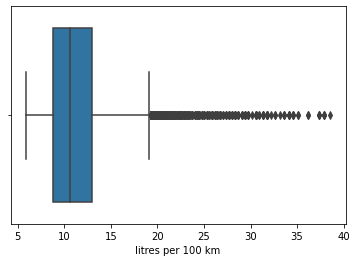

In [92]:
#Outlier visualization
sns.boxplot(x=can_dollar['litres per 100 km'])

In [93]:
#Outlier removal
can_dollar= can_dollar.drop(can_dollar[(can_dollar['litres per 100 km'] > 18)].index)

In [94]:
can_dollar.shape

(25652, 19)

The outliers for the Canadian dollar have been visualized and removed

## US Dollar ($) - Outlier removal

In [95]:
#removing Rand (R) outliers
dollar = filtered_data.loc[filtered_data['currency'] == '$.']
#Old shape
dollar.describe()

,gallons,mpg,miles,total_spent_float,cost_per_gallon_float,litres filled,km driven,litres per 100 km
count,538457.000000,538457.000000,538457.000000,538457.000000,536677.000000,538457.000000,538457.000000,5.384570e+05
mean,13.234137,20.814035,258.097900,58.843590,5.269662,50.090504,415.277161,inf
std,54.823368,14.767419,183.248276,102.571808,13.723515,207.486206,294.761169,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.881845e-01
25%,9.695000,15.100000,186.562393,28.930000,2.649000,36.695576,300.178894,9.012069e+00
50%,12.568000,20.600000,264.266388,39.610001,3.099000,47.569881,425.204620,1.141820e+01
75%,15.412000,26.100000,330.298431,52.820000,3.759000,58.334419,531.450195,1.557715e+01
max,21014.900391,399.899994,13031.105469,999.989990,1767.677979,79541.398438,20967.048828,inf


<AxesSubplot:xlabel='gallons'>

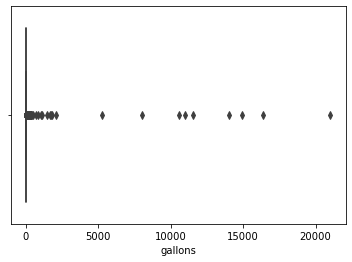

In [96]:
#Outlier visualization
sns.boxplot(x=dollar['gallons'])

In [97]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['gallons'] > 20)].index)
dollar= dollar.drop(dollar[(dollar['gallons'] < 2)].index)

<AxesSubplot:xlabel='mpg'>

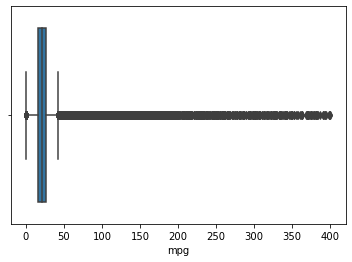

In [98]:
#Outlier visualization
sns.boxplot(x=dollar['mpg'])

In [99]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['mpg'] > 35)].index)
dollar= dollar.drop(dollar[(dollar['mpg'] < 6)].index)

<AxesSubplot:xlabel='miles'>

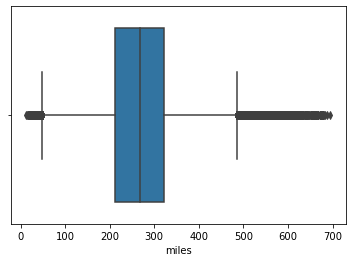

In [100]:
#Outlier visualization
sns.boxplot(x=dollar['miles'])

In [101]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['miles'] > 470)].index)
dollar= dollar.drop(dollar[(dollar['miles'] < 80)].index)

<AxesSubplot:xlabel='total_spent_float'>

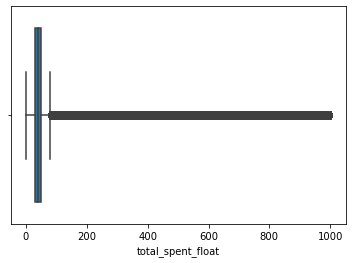

In [102]:
#Outlier visualization
sns.boxplot(x=dollar['total_spent_float'])

In [103]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['total_spent_float'] > 70)].index)
dollar= dollar.drop(dollar[(dollar['total_spent_float'] < 8)].index)

<AxesSubplot:xlabel='cost_per_gallon_float'>

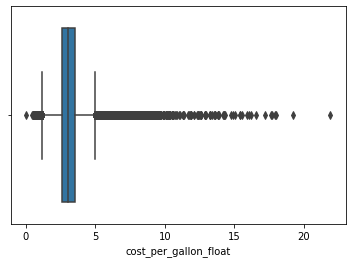

In [104]:
#Outlier visualization
sns.boxplot(x=dollar['cost_per_gallon_float'])

In [105]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['cost_per_gallon_float'] > 4.5)].index)
dollar= dollar.drop(dollar[(dollar['cost_per_gallon_float'] < 1.5)].index)

<AxesSubplot:xlabel='litres filled'>

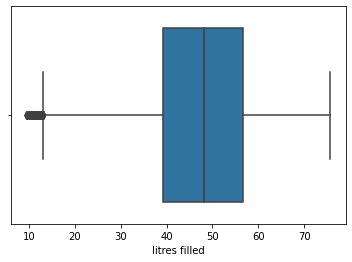

In [106]:
#Outlier visualization
sns.boxplot(x=dollar['litres filled'])

In [107]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['litres filled'] < 14)].index)

<AxesSubplot:xlabel='km driven'>

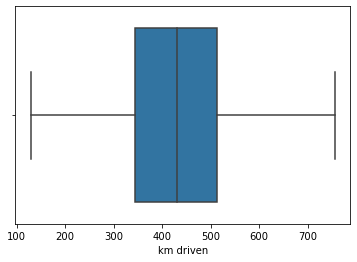

In [108]:
#Outlier visualization
sns.boxplot(x=dollar['km driven'])

In [109]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['km driven'] > 800)].index)

<AxesSubplot:xlabel='litres per 100 km'>

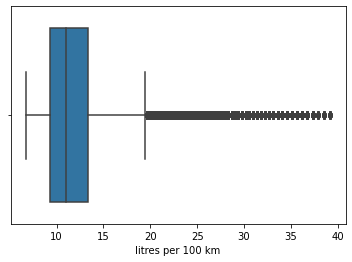

In [110]:
#Outlier visualization
sns.boxplot(x=dollar['litres per 100 km'])

In [111]:
#Outlier removal
dollar= dollar.drop(dollar[(dollar['litres per 100 km'] > 17)].index)

In [112]:
main_currency = pd.concat([dollar, rand,euro,pound,can_dollar])
main_currency.shape

(437301, 19)

In [113]:
main_currency.tail()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cost_per_gallon_float,Car make,model,year,User ID,litres filled,km driven,litres per 100 km,currency
709964,2022-01-01,Mar 24 2022,"143,421",10.043,CA$5.48,CA$55.09,36.799999,369.582397,https://www.somewebsite.com/toyota/corolla/200...,55.090000,5.48,toyota,corolla,2003,811292,38.012756,594.658081,6.391712,CA$.
864413,2022-01-01,Jan 1 2022,"31,777",11.416,CA$4.99,CA$57.00,28.000000,319.648010,https://www.somewebsite.com/hyundai/kona/2020/...,57.000000,4.99,hyundai,kona,2020,1010567,43.209564,514.313660,8.400536,CA$.
277368,2022-01-01,Jan 1 2022,"97,924",10.136,CA$6.20,CA$62.89,26.500000,268.604004,https://www.somewebsite.com/lexus/is250/2011/9...,62.889999,6.20,lexus,is250,2011,966670,38.364761,432.183838,8.876038,CA$.
717004,2022-01-01,Jan 8 2022,"9,551",8.112,CA$4.88,CA$39.58,20.400000,165.484802,https://www.somewebsite.com/ford/escape/2020/1...,39.580002,4.88,ford,escape,2020,1056788,30.703922,266.265045,11.530148,CA$.
658799,2022-01-01,Jan 1 2022,"87,859",11.640,CA$5.67,CA$66.05,26.000000,302.640015,https://www.somewebsite.com/kia/forte5/2012/93...,66.050003,5.67,kia,forte5,2012,933543,44.057404,486.947784,9.046731,CA$.


278020 values have been removed after accounting for outliers. 

### 4.2 Fuel Efficiency

We create a cost_per_litre column in Rands for the US, Britain, South Africa, Europe Union and compare their differences for  January 2022.

In [114]:
#United States
#converting to cost per litre
dollar['cost_per_litre'] = dollar['cost_per_gallon_float']/3.78541
# converting the cost per litre to rands
dollar['cost_per_litre'] = dollar['cost_per_litre']*16.23

#January 2022 filtering
dollar_filtered = dollar[dollar['date_fueled'].dt.strftime('%Y-%m') == '2022-01']
print("The current USD/ZAR exchange rate was 16.23 from Yahoo Finance ")
print(f'Average cost per litre (in Rands) for the US is: R{dollar_filtered["cost_per_litre"].mean()}')

The current USD/ZAR exchange rate was 16.23 from Yahoo Finance 
Average cost per litre (in Rands) for the US is: R14.310972213745117


In [115]:
#Canadian dollar
#converting to cost per litre
can_dollar['cost_per_litre'] = can_dollar['cost_per_gallon_float']/4.54609
# converting the cost per litre to rands
can_dollar['cost_per_litre'] = can_dollar['cost_per_litre']*12.47

#January 2022 filtering
can_dollar_filtered = can_dollar[can_dollar['date_fueled'].dt.strftime('%Y-%m') == '2022-01']
print("The current CAD/ZAR exchange rate was 12.47 from Yahoo Finance ")
print(f'Average cost per litre (in Rands) for the Britiain is: R{can_dollar_filtered["cost_per_litre"].mean()}')

The current CAD/ZAR exchange rate was 12.47 from Yahoo Finance 
Average cost per litre (in Rands) for the Britiain is: R15.163396835327148


In [116]:
#European Union
#converting to cost per litre
euro['cost_per_litre'] = euro['cost_per_gallon_float']/4.54609
# converting the cost per litre to rands
euro['cost_per_litre'] = euro['cost_per_litre']*17.07

#January 2022 filtering
euro_filtered = euro[euro['date_fueled'].dt.strftime('%Y-%m') == '2022-01']
print("The current  EUR/ZAR exchange rate was 17.07 from Yahoo Finance ")
print(f'Average cost per litre (in Rands) for the European Union is: R{euro_filtered["cost_per_litre"].mean()}')

The current  EUR/ZAR exchange rate was 17.07 from Yahoo Finance 
Average cost per litre (in Rands) for the European Union is: R21.598575592041016


In [117]:
#Britain
#converting to cost per litre
pound['cost_per_litre'] = pound['cost_per_gallon_float']/4.54609
# converting the cost per litre to rands
pound['cost_per_litre'] = pound['cost_per_litre']*19.89

#January 2022 filtering
pound_filtered = pound[pound['date_fueled'].dt.strftime('%Y-%m') == '2022-01']
print("The current GBP/ZAR exchange rate was 19.89 from Yahoo Finance ")
print(f'Average cost per litre (in Rands) for the Britiain is: R{pound_filtered["cost_per_litre"].mean()}')

The current GBP/ZAR exchange rate was 19.89 from Yahoo Finance 
Average cost per litre (in Rands) for the Britiain is: R23.943214416503906


From the results we can summarize that, there is a significant discrepancy in the pricing between countries. Richer countries often have higher pricing, whereas poorer countries and those that produce and export oil have dramatically lower prices. The pricing disparities across countries are due to different fuel taxes and subsidies. All nations have access to the same worldwide petroleum pricing but choose to levy various taxes. As a result, the retail price of gasoline fluctuates. The only exception is the US, which has an advanced economy, but low fuel prices.The US continues to spend billions in subsidies for oil exploration, which helps keep fuel costs artificially low. South Africa cost per litres did not have values for January 2022 therefore could not be computed, this may be due to outlier which may have been removed.

## Odometer readings

The basic rule to identify missing values is to look at the cases where there is missing data 
and figure out if there is a sensible root cause for this. i.e check if there is
a correlation between the missing values and some other 
feature in the dataset. 

There are three general types of scenarios for this:
-   Data is missing completely at random (MCAR), 
-   missing at random (MAR), 
-   missing not at random (MNAR)

In our case, the data is missing completely at random, there is no explanation as to why people did not answer.

In [118]:

print(f'Before removing the outliers, there were {raw_data["odometer"].isna().sum()} missing values in the odometer column')

Before removing the outliers, there were 149154 missing values in the odometer column


We now plot the average distance (in km) per tank for each country

In [119]:
#Calculating the average for each country
print(f'The average km driven for SA is {rand["km driven"].mean()}')
print(f'The average km driven for Europe is {euro["km driven"].mean()}')
print(f'The average km driven for the US is {dollar["km driven"].mean()}')
print(f'The average km driven for Canada is {can_dollar["km driven"].mean()}')
print(f'The average km driven for Britain is {pound["km driven"].mean()}')

The average km driven for SA is 511.9111633300781
The average km driven for Europe is 617.8850708007812
The average km driven for the US is 441.4483642578125
The average km driven for Canada is 424.723388671875
The average km driven for Britain is 589.9613647460938


Text(0.5, 1.0, 'Km driven')

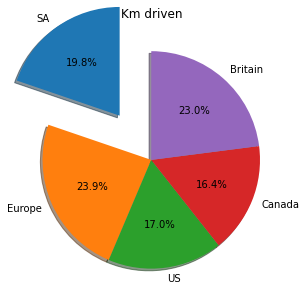

In [120]:
#Pie chart plot
plt.figure(figsize=(10, 5))
val = [512,618,441,425,595]
labels = ['SA', 'Europe', 'US', 'Canada', 'Britain']
expl = [0.5,0,0,0,0]
plt.pie(val, labels=labels, explode=expl, startangle=90, shadow=True, autopct='%1.1f%%', radius=1)
plt.title("Km driven")


From the results, we can see that Britain has has the largest average
distance. People in UK tend to drive smaller vehicles, which will have better fuel economy

<AxesSubplot:xlabel='year', ylabel='km driven'>

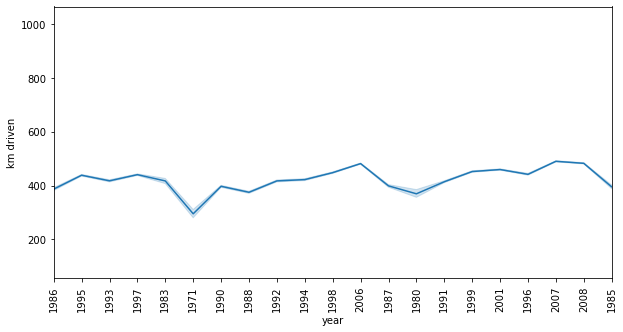

In [121]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 20)
plt.xticks(rotation=90)
sns.lineplot(x = 'year', y = 'km driven', data = main_currency)

By comparing the year the vehicle was manufactured with the kilometers travelled, we may conclude that newer vehicles drive longer distances between fill-ups. We can observe that the older the vehicle, the less kilometers it traveled, and the newer the vehicle, the greater the number of kilometers it travelled.

### Top 5 most popular vehicles in SA fuel efficiency

In [122]:
#Check the most popular car brands in SA
rand['Car make'].value_counts().head()

volkswagen    1743
nissan        1578
ford          1542
bmw           1540
toyota        1452
Name: Car make, dtype: int64

The Top 5 most popular vehicles in SA are : VW, Nissan, Ford, BMW, Toyota

We now compute their fuel
efficiency and discuss whether these values are realistic.

In [123]:
vw = rand[rand['Car make'] == 'volkswagen']
print(f'The average fuel efficiency for VW is :{vw["litres per 100 km"].mean()} which is realistic.' )
nissan = rand[rand['Car make'] == 'nissan']
print(f'The average fuel efficiency for Nissan is :{nissan["litres per 100 km"].mean()} which is realistic.' )
ford = rand[rand['Car make'] == 'ford']
print(f'The average fuel efficiency for Ford is :{ford["litres per 100 km"].mean()} which is realistic.' )
bmw = rand[rand['Car make'] == 'ford']
print(f'The average fuel efficiency for BMW is :{bmw["litres per 100 km"].mean()} which is realistic.' )
toyota = rand[rand['Car make'] == 'toyota']
print(f'The average fuel efficiency for Toyota is :{toyota["litres per 100 km"].mean()} which is realistic.' )

The average fuel efficiency for VW is :8.4591064453125 which is realistic.
The average fuel efficiency for Nissan is :9.5407075881958 which is realistic.
The average fuel efficiency for Ford is :8.48387336730957 which is realistic.
The average fuel efficiency for BMW is :8.48387336730957 which is realistic.
The average fuel efficiency for Toyota is :9.653664588928223 which is realistic.


## Most fuel efficient vehicle in each country

We now determine the most fuel efficient vehicles in each country. Anything that is listed as less than 7-litres/100km or more than 16.5km/1-litre is considered to be a
good fuel economy

### South Africa vehicle fuel efficiency

In [124]:
#we define the fuel eeficiency boundry
fuel_eff = rand.loc[(rand['litres per 100 km'] >= 1) & (rand['litres per 100 km'] <= 6)]
fuel_eff[['Car make','model','litres per 100 km']].head()

,Car make,model,litres per 100 km
847828,hyundai,atos,5.793473
1137953,volkswagen,jetta,5.080237
307824,mercedes-benz,c180,5.895113
1085262,audi,a3,5.333673
345608,hyundai,crdi,5.640647


Some of the most fuel efficient cars in South Africa are printed above

## United States vehicle fuel efficiency

In [125]:
#we define the fuel eeficiency boundry
fuel_eff = dollar.loc[(dollar['litres per 100 km'] >= 1) & (dollar['litres per 100 km'] <= 7)]
fuel_eff[['Car make','model','litres per 100 km']].head()

,Car make,model,litres per 100 km
19026,honda,civic,6.897801
748358,subaru,legacy,6.817826
405225,toyota,paseo,6.798121
1113714,toyota,mr2,6.979673
942568,toyota,mr2,6.759052


Some of the most fuel efficient cars in the United States are printed above

## Britain vehicle fuel efficiency

In [126]:
#we define the fuel eeficiency boundry
fuel_eff = pound.loc[(pound['litres per 100 km'] >= 1) & (pound['litres per 100 km'] <= 6)]
fuel_eff[['Car make','model','litres per 100 km']].head()

,Car make,model,litres per 100 km
623284,ford,mondeo,5.470116
87226,ford,mondeo,5.135699
479144,ford,mondeo,4.810122
188873,ford,mondeo,4.723193
654920,ford,mondeo,4.859814


Some of the most fuel efficient cars in the Britain are printed above

## Europe vehicle fuel efficiency

In [127]:
#we define the fuel eeficiency boundry
fuel_eff = euro.loc[(euro['litres per 100 km'] >= 1) & (euro['litres per 100 km'] <= 6)]
fuel_eff[['Car make','model','litres per 100 km']].head()

,Car make,model,litres per 100 km
382233,citroen,xantia,5.124509
34865,citroen,xantia,5.939773
119184,citroen,xantia,5.736951
672703,ford,galaxie,4.429661
128644,citroen,xantia,5.333673


Some of  the most fuel efficient vehicles in Europe are printed above

## Canada vehicle fuel efficiency

In [128]:
#we define the fuel eeficiency boundry
fuel_eff = can_dollar.loc[(can_dollar['litres per 100 km'] >= 1) & (can_dollar['litres per 100 km'] <= 6)]
fuel_eff[['Car make','model','litres per 100 km']].head()

,Car make,model,litres per 100 km
671900,suzuki,swift,5.969923
1169622,suzuki,swift,5.880375
454796,suzuki,swift,5.895113
363315,toyota,tercel,5.924811
719596,honda,beat,5.895113


Some of the most fuel efficient vehicles in Canada are printed above

### Fuel efficiency for the top 5 Canadian vehicles between seasons

We now plot the difference in fuel efficiency for the top 5 Canadian vehicles between seasons

In [129]:
can_dollar['Car make'].value_counts().head()

toyota     2621
bmw        2532
mazda      2145
hyundai    1924
nissan     1871
Name: Car make, dtype: int64

The top 5 most popular vehicles in Canada are: Toyota, BMW, Mazda, Hyundai, Nissan

## Top 5 most popular vehicles between the four seasons

We now plot the difference in fuel efficiency for the top 5 Canadian vehicles between seasons

### Canadian Summer fuel efficiency

In [130]:
#Summer runs from June to August in Canada
df_june = can_dollar[can_dollar['date_fueled'] == '2021-06']
df_july = can_dollar[can_dollar['date_fueled'] == '2021-07']
df_august = can_dollar[can_dollar['date_fueled'] == '2021-08']
df_summer = pd.concat([df_june,df_july,df_august])


In [131]:
#top 5 most popular vehicles in Canada
df_toyota = df_summer[df_summer['Car make'] == 'toyota']
df_bmw = df_summer[df_summer['Car make'] == 'bmw']
df_mazda = df_summer[df_summer['Car make'] == 'mazda']
df_hyandai = df_summer[df_summer['Car make'] == 'hyundai']
df_nissan = df_summer[df_summer['Car make'] == 'nissan']
fuel_eff_summer = pd.concat([df_toyota, df_bmw ,df_mazda,df_hyandai,df_nissan])

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

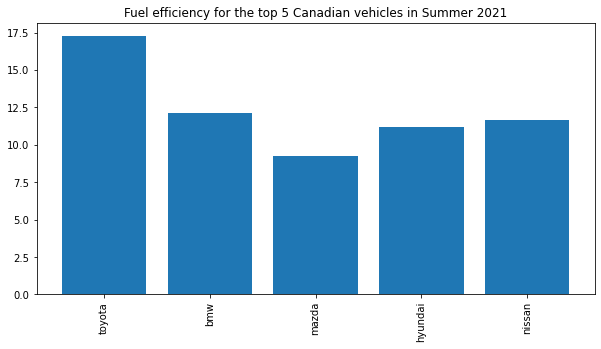

In [132]:
#plotting the graph
plt.figure(figsize=(10, 5))
plot_distrubution_x = fuel_eff_summer['Car make']
plot_distribution_y = fuel_eff_summer['litres per 100 km']
plt.bar(plot_distrubution_x,plot_distribution_y)
plt.title("Fuel efficiency for the top 5 Canadian vehicles in Summer 2021")
plt.xticks(rotation=90)

### Canadian Winter fuel efficiency

In [133]:
#Winter runs from Dec to Feb in Canada
df_dec = can_dollar[can_dollar['date_fueled'] == '2021-12']
df_jan = can_dollar[can_dollar['date_fueled'] == '2021-01']
df_feb = can_dollar[can_dollar['date_fueled'] == '2021-02']
df_winter = pd.concat([df_dec,df_jan,df_feb])


In [134]:
#top 5 most popular vehicles in Canada
df_toyota = df_winter[df_winter['Car make'] == 'toyota']
df_bmw = df_winter[df_winter['Car make'] == 'bmw']
df_mazda = df_winter[df_winter['Car make'] == 'mazda']
df_hyandai = df_winter[df_winter['Car make'] == 'hyundai']
df_nissan = df_winter[df_winter['Car make'] == 'nissan']
fuel_eff_winter = pd.concat([df_toyota, df_bmw ,df_mazda,df_hyandai,df_nissan])

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

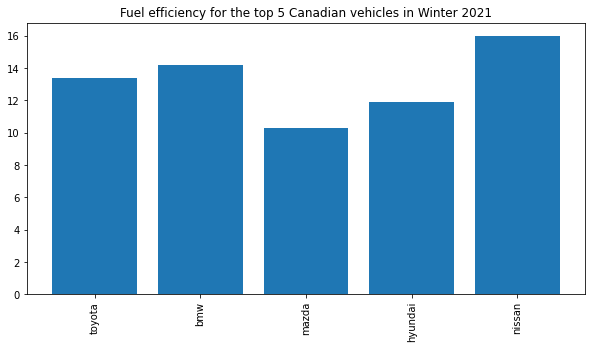

In [135]:
#plotting the graph
plt.figure(figsize=(10, 5))
plot_distrubution_x = fuel_eff_winter['Car make']
plot_distribution_y = fuel_eff_winter['litres per 100 km']
plt.bar(plot_distrubution_x,plot_distribution_y)
plt.title("Fuel efficiency for the top 5 Canadian vehicles in Winter 2021")
plt.xticks(rotation=90)

### Canadian Autumn fuel efficiency

In [136]:
#Autumn runs from Sept to Nov
df_sept = can_dollar[can_dollar['date_fueled'] == '2021-09']
df_oct = can_dollar[can_dollar['date_fueled'] == '2021-10']
df_nov = can_dollar[can_dollar['date_fueled'] == '2021-11']
df_autumn = pd.concat([df_sept,df_oct,df_nov])

In [137]:
#top 5 most popular vehicles in Canada
df_toyota = df_autumn[df_autumn['Car make'] == 'toyota']
df_bmw = df_autumn[df_autumn['Car make'] == 'bmw']
df_mazda = df_autumn[df_autumn['Car make'] == 'mazda']
df_hyandai = df_autumn[df_autumn['Car make'] == 'hyundai']
df_nissan = df_autumn[df_autumn['Car make'] == 'nissan']
fuel_eff_autumn = pd.concat([df_toyota, df_bmw ,df_mazda,df_hyandai,df_nissan])

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

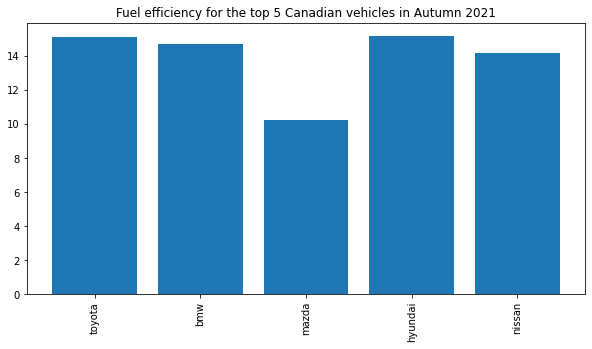

In [138]:
#plotting the graph
plt.figure(figsize=(10, 5))
plot_distrubution_x = fuel_eff_autumn['Car make']
plot_distribution_y = fuel_eff_autumn['litres per 100 km']
plt.bar(plot_distrubution_x,plot_distribution_y)
plt.title("Fuel efficiency for the top 5 Canadian vehicles in Autumn 2021")
plt.xticks(rotation=90)

### Canadian Spring fuel efficiency

In [139]:
#Spring runs from March to May
df_sept = can_dollar[can_dollar['date_fueled'] == '2021-03']
df_oct = can_dollar[can_dollar['date_fueled'] == '2021-04']
df_nov = can_dollar[can_dollar['date_fueled'] == '2021-05']
df_spring = pd.concat([df_sept,df_oct,df_nov])

In [140]:
#top 5 most popular vehicles in Canada
df_toyota = df_autumn[df_autumn['Car make'] == 'toyota']
df_bmw = df_autumn[df_autumn['Car make'] == 'bmw']
df_mazda = df_autumn[df_autumn['Car make'] == 'mazda']
df_hyandai = df_autumn[df_autumn['Car make'] == 'hyundai']
df_nissan = df_autumn[df_autumn['Car make'] == 'nissan']
fuel_eff_spring = pd.concat([df_toyota, df_bmw ,df_mazda,df_hyandai,df_nissan])

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

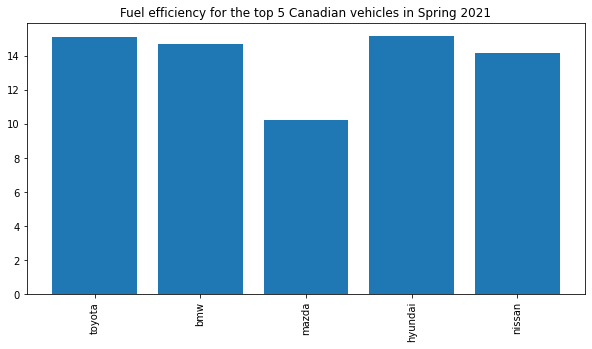

In [141]:
#plotting the graph
plt.figure(figsize=(10, 5))
plot_distrubution_x = fuel_eff_spring['Car make']
plot_distribution_y = fuel_eff_spring['litres per 100 km']
plt.bar(plot_distrubution_x,plot_distribution_y)
plt.title("Fuel efficiency for the top 5 Canadian vehicles in Spring 2021")
plt.xticks(rotation=90)

From the results, we notice that the cars simply get better gas mileage during warm weather than they do when it's cold.
This is because cold engines use much more fuel than properly warmed up ones.

### Correlations between fuel efficiency and other features.

We show the correlations between fuel efficiency and other features.


In [142]:
sns.set(rc={'figure.figsize':(10,5)})
cor = main_currency[['litres per 100 km','km driven','litres filled','total_spent_float' ]].corr()
cor

,litres per 100 km,km driven,litres filled,total_spent_float
litres per 100 km,1.000000,-0.539355,0.348981,-0.068475
km driven,-0.539355,1.000000,0.548743,0.165877
litres filled,0.348981,0.548743,1.000000,0.121610
total_spent_float,-0.068475,0.165877,0.121610,1.000000


We now utlize a correaltion heatmap to show the correlations between fuel efficiency and other features to measure how well they are related

<AxesSubplot:title={'center':'Correlation heatmap between different features'}>

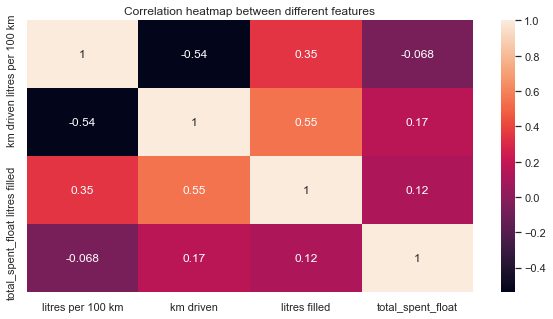

In [143]:
#correlation heatmap
plt.title('Correlation heatmap between different features')
sns.heatmap(cor,annot=True)

The above plot shows a correlation heatmap between different variables e.g Fuel efficiency and litres filled have a low (postive) correlation.




In [144]:
main_currency.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cost_per_gallon_float,Car make,model,year,User ID,litres filled,km driven,litres per 100 km,currency
341874,2005-01-06,Oct 11 2008,"153,582",12.598,$1.990,$25.07,21.400000,269.597198,https://www.somewebsite.com/bmw/535i/1986/10501,25.070000,1.990,bmw,535i,1986,10501,47.683430,433.781891,10.991355,$.
152908,2005-01-13,Oct 11 2008,"153,868",12.387,$1.990,$24.65,23.100000,286.139709,https://www.somewebsite.com/bmw/535i/1986/10501,24.650000,1.990,bmw,535i,1986,10501,46.884796,460.398773,10.182467,$.
720594,2005-01-23,Oct 11 2008,"154,101",11.353,$1.990,$22.59,20.500000,232.736496,https://www.somewebsite.com/bmw/535i/1986/10501,22.590000,1.990,bmw,535i,1986,10501,42.971104,374.473022,11.473903,$.
1089984,2005-02-12,Dec 28 2009,NaN,12.509,$2.159,$27.01,17.700001,221.409302,https://www.somewebsite.com/nissan/300zx/1995/...,27.010000,2.159,nissan,300zx,1995,32077,47.346565,356.247559,13.288982,$.
1075524,2005-02-20,Oct 11 2008,"155,177",11.380,$2.010,$22.87,23.000000,261.739990,https://www.somewebsite.com/bmw/535i/1986/10501,22.870001,2.010,bmw,535i,1986,10501,43.073303,421.139648,10.226739,$.


## Random Forest

In [145]:
#create a new top 5 currency csv file the for random forest algorithm so we can drop th columns we don't want
# saving the dataframe
main_currency.to_csv('distance_driven.csv')

We now use a random forest to get a list of the most important variables when it comes to distance travelled (km driven)

In [146]:
def load_data(dataset):
 
    dataset_files = {
        'distance_driven': {'filename': 'distance_driven.csv', 'target': 'km driven'}  # classification, https://www.kaggle.com/rounakbanik/pokemon
    }
    df = pd.read_csv(dataset_files[dataset]['filename'])
    y = df[dataset_files[dataset]['target']].values
    df.drop(columns=dataset_files[dataset]['target'], inplace=True)
   # if dataset in dataset_call.keys():
       # data = dataset_call[dataset]()
       # y = data.target
       # df = pd.DataFrame(data.data, columns=data.feature_names)
   # else:
    df = pd.read_csv(dataset_files[dataset]['filename'])
    y = df[dataset_files[dataset]['target']].values
    df.drop(columns=dataset_files[dataset]['target'], inplace=True)
               
    X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=42)
    out_dict = {
        'y': y,
        'df': df,
        'x_train': X_train,
        'x_valid': X_valid,
        'y_train': y_train,
        'y_valid': y_valid
    }
    return out_dict
    
ds = {}
for d in ['distance_driven']:
    ds[d] = load_data(d)

C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\3321535179.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_files[dataset]['filename'])
C:\Users\rmnev\AppData\Local\Temp\ipykernel_17008\3321535179.py:14: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_files[dataset]['filename'])


                Features   Importances
2  cost_per_gallon_float  4.748349e-07
0             Unnamed: 0  5.186764e-07
1      total_spent_float  1.517637e-06
3          litres filled  4.550378e-01
4      litres per 100 km  5.449596e-01


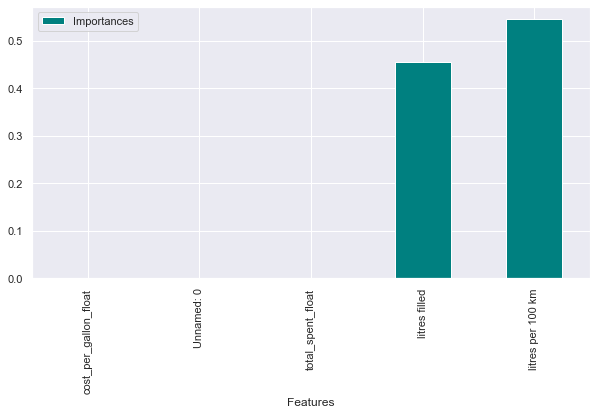

In [147]:
# create the random forest with your hyperparameters.

d = 'distance_driven'
# drop the columns that are not numerical for this:
# numerics = ['int16','int32','int64','float16','float32','float64']
# numerical_vars = list(data.select_dtypes(include=numerics).columns)
# data = data[numerical_vars]
ds[d]['x_train'].fillna(1, inplace=True)  # note, the weight has some nans in it
x_train = ds[d]['x_train'].drop(columns=['date_fueled', 'date_captured', 'odometer', 'gallons', 'cost_per_gallon', 'total_spent', 'mpg',
                                        'miles','user_url','Car make','model','year','User ID','currency'])

model = RandomForestRegressor(n_estimators=250, random_state=42, max_depth=10)
# fit the model to start training.
model.fit(x_train, ds[d]['y_train'])
# get the importance of the resulting features.
importances = model.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({ "Features": pd.DataFrame(x_train).columns, "Importances": importances})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
print(final_df)

From the results using the Random Forest Classifier, we can see that most important features when it comes the distance driven are litres per 100 km (Fuel efficiency) and litres filled. Litres filled is how many litres the user they refueled with and litres per 100 km is the computed fuel efficiency. On the correlation heatmap we can still see
that fuel efficiency and litres filled were the two features that were mostly correlated with distance driven (km driven).


## 4.3 Fuel usage in SA

We filter to data focus on SA drivers by using the Rand dataset.

In [148]:
#SA drivers
rand.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,total_spent_float,cost_per_gallon_float,Car make,model,year,User ID,litres filled,km driven,litres per 100 km,currency
757619,2008-07-22,Jun 5 2012,"5,422",5.565,R39.75,R221.19,33.400002,185.871017,https://www.somewebsite.com/suzuki/st90v/1983/...,221.190002,39.750000,suzuki,st90v,1983,132066,21.063526,299.066467,7.042365,R.
678891,2008-09-20,Jun 26 2009,"6,273",8.065,R35.66,R287.59,38.500000,310.502472,https://www.somewebsite.com/hyundai/atos/2008/...,287.589996,35.660000,hyundai,atos,2008,21520,30.526024,499.598480,6.109480,R.
847828,2010-05-14,Aug 11 2011,"72,546",7.981,R32.33,R258.00,40.599998,324.028595,https://www.somewebsite.com/hyundai/atos/2005/...,258.000000,32.330002,hyundai,atos,2005,85279,30.208086,521.362000,5.793473,R.
267532,2010-05-16,May 26 2010,"62,182",11.456,R32.10,R367.74,24.400000,279.526398,https://www.somewebsite.com/volkswagen/fox/199...,367.739990,32.099998,volkswagen,fox,1994,27767,43.360962,449.757965,9.639959,R.
817542,2010-05-19,Dec 28 2010,"96,429",7.241,R32.29,R233.81,31.400000,227.367401,https://www.somewebsite.com/audi/a3/2002/56121,233.809998,32.290001,audi,a3,2002,56121,27.407187,365.834137,7.490923,R.


The dataset is filtered to focus on SA drivers

We create the cost per litre column for the rand

In [149]:
#create cost per litre column for SA
#converting to cost per litre
rand['cost_per_litre'] = rand['cost_per_gallon_float']/3.78541

### Plotting the fuel prices over time for SA

(array([13149., 13879., 14610., 15340., 16071., 16801., 17532., 18262.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

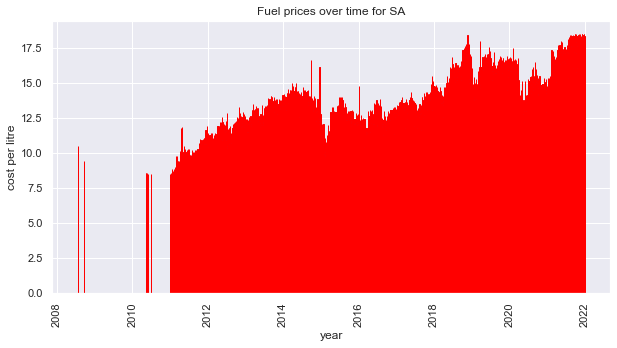

In [150]:
plt.figure(figsize=(10, 5))
plot_distrubution_x = rand['date_fueled']
plot_distribution_y = rand['cost_per_litre']
plt.bar(plot_distrubution_x,plot_distribution_y,edgecolor='red')
plt.title("Fuel prices over time for SA")
plt.xlabel('year')
plt.ylabel('cost per litre')
plt.xticks(rotation=90)

We add an indicator column (day_of_week) to show the day of the week that the transaction happened

In [151]:
# add indicator column
rand['day_of_week'] = rand['date_fueled'].dt.day_name()

In [152]:
rand['day_of_week'].head()

757619      Tuesday
678891     Saturday
847828       Friday
267532       Sunday
817542    Wednesday
Name: day_of_week, dtype: object

<AxesSubplot:xlabel='date_fueled', ylabel='cost_per_litre'>

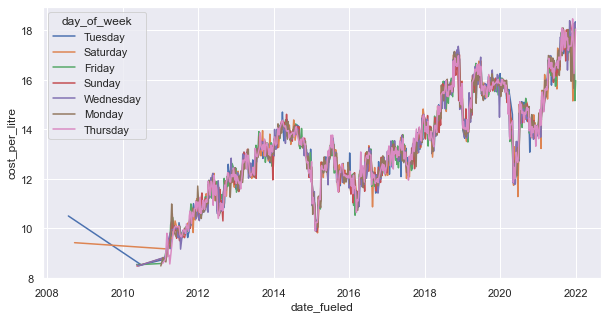

In [153]:
sns.lineplot(x = 'date_fueled', y = 'cost_per_litre', data = rand, hue= 'day_of_week', ci=False, markers=True)

From the plot we can see that there is a slight difference between people refuelling on a Tuesday vs other
days.

We now reduce our dataset to only the entries on Tuesday and Wednesday in SA every
month.

In [154]:
#first reduce the dataset to wednesdays and tuesdays
df_tuesday = rand[rand['day_of_week'] == 'Tuesday']
df_wednesday = rand[rand['day_of_week'] == 'Wednesday']
df_refueling_day = pd.concat([df_tuesday,df_wednesday])

<AxesSubplot:xlabel='date_fueled', ylabel='cost_per_litre'>

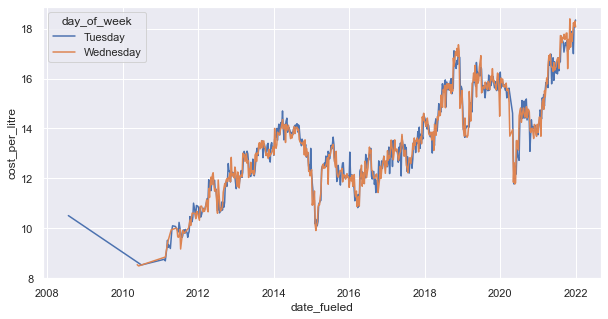

In [155]:
sns.lineplot(x = 'date_fueled', y = 'cost_per_litre', data = df_refueling_day,  hue= 'day_of_week', ci=False, markers=True)

More people refuel on the first Wednesday of the month when the prices goes down and
more people refuel on the first Tuesday of the month when the prices goes up.

In [156]:
#Ends

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6f563f8-6fb8-43b8-80d9-89413cdb5a31' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>